In [1]:
!pip list

Package                Version
---------------------- ---------
brotlipy               0.7.0
certifi                2021.10.8
cffi                   1.15.0
charset-normalizer     2.0.4
conda                  4.12.0
conda-content-trust    0+unknown
conda-package-handling 1.7.3
cryptography           36.0.0
idna                   3.3
numpy                  1.20.3
pandas                 1.2.3
pip                    21.2.4
pycosat                0.6.3
pycparser              2.21
pyOpenSSL              21.0.0
PySocks                1.7.1
python-dateutil        2.8.2
pytz                   2022.1
requests               2.27.1
ruamel-yaml-conda      0.15.100
setuptools             58.0.4
six                    1.16.0
tqdm                   4.62.3
urllib3                1.26.7
wheel                  0.37.1


In [28]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

#def geneid_slicer(gene_id):
        # removing the last two string of cnts geneid column
        #sliced_geneid = gene_id[:-2]
        #return sliced_geneid
        
#or i in range(mouselocal.index):
 #  for j in range(cnts.index):  
  ##     if mouselocal.index[i] == sliced_geneid:
            #ouselocal df addcnts.index[j].cnts['clip_enrichment']
            #mouselocal df addcnts.index[j].cnts['rden_change']

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


In [15]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#')
cnts.head()

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
0,ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
1,ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
2,ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
3,ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
4,ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


In [32]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()
cnts_sorted = cnts[['Geneid','clip_enrichment','rden_change']]
cnts_sorted['Geneid'] = cnts_sorted.Geneid.apply(lambda x: x[:-2])
cnts_sorted.head()

/tmp/ipykernel_4404/556774174.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnts_sorted['Geneid'] = cnts_sorted.Geneid.apply(lambda x: x[:-2])


,Geneid,clip_enrichment,rden_change
0,ENSMUSG00000102693,NaN,NaN
1,ENSMUSG00000064842,NaN,NaN
2,ENSMUSG00000051951,4.0,NaN
3,ENSMUSG00000102851,inf,NaN
4,ENSMUSG00000103377,NaN,NaN


In [46]:
# mouselocal & cnts_sorted merged dataframe
len(cnts_sorted.index)
len(mouselocal.index)
mouselocal.head()
local = pd.merge(mouselocal, cnts_sorted, left_on='gene_id', right_on='Geneid', how='left')
len(local.index)

9523

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


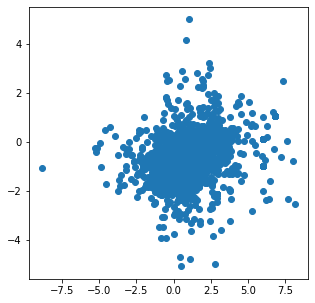

In [47]:
from matplotlib import pyplot as plt
import numpy as np

for i in range()
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(np.log2(local['clip_enrichment']),
          np.log2(local['rden_change']))
# modified mouselocal's clip_enrichment, rden_change, color, localization is needed
